<a href="https://colab.research.google.com/github/hasune613/hello/blob/main/callback%E9%96%A2%E6%95%B0%E3%80%81%E3%83%87%E3%82%B6%E3%82%A4%E3%83%B3%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## コールバック関数_基礎
* 関数オブジェクトの概要

In [ ]:
"""
関数を変数として代入してみる。
本来は、ただの変数に()を付けて実行することはできないが
関数として代入した場合はあたかもメゾットのように()を付けて実行することができる

"""
def morning():
    print('おはよう')


message = morning
message()

おはよう


In [ ]:
"""
関数の引数として関数を渡すこともできる

"""
def greet(func):
    func()

def morning(): # 関数greetに渡されて実行される関数その1
    print('おはよう')

def evening():  # 関数greetに渡されて実行される関数その1
    print('こんばんは')

In [ ]:
greet(morning)

おはよう


In [ ]:
greet(evening)

こんばんは


In [ ]:
"""
【プログラム】
関数list_checkが、引数で受け取ったnum_listの各要素の値をチェックして、
値が0以上のものだけを抽出し、新たなリストafter_num_listに格納していく。

"""
new_list = []

def check_list(org_list):
    
    for l in org_list:
        if l >= 0: # '>=0'の条件分岐が固定されているため汎用性がない
            new_list.append(l)
    return new_list

org_list = [9,-2,5,-1,0,1,-3,2,-4,3,4]

check_list(org_list)

[9, 5, 0, 1, 2, 3, 4]

In [ ]:
"""閾値(threshold)も関数の引数として渡してあげる形にする"""

after_list = []

def check_list_2(org_list,threshold):
    for l in org_list:
        if l >= threshold:
            after_list.append(l)
    return after_list

org_list = [9,-2,5,-1,0,1,-3,2,-4,3,4]
check_list_2(org_list, 4)

[9, 5, 4]

In [ ]:
"""条件式部分だけを別の関数として準備して、その関数を引数として渡す"""

after_list = []
org_list = [9,-2,5,-1,0,1,-3,2,-4,3,4]

def list_check_3(org_list, callback): # コールバック関数を追加
    for l in org_list:
        if callback(l): # コールバック関数が条件を判定
            after_list.append(l)
    return after_list

# コールバック関数_1を定義
def callback_func_1(l):
    if -1 <= l <= 1:
        return True
    else:
        return False

# コールバック関数_2を定義
def callback_func_2(l):
    if l % 2 == 0:
        return True
    else:
        return False

In [ ]:
list_check_3(org_list,callback_func_1)


[-1, 0, 1]

In [ ]:
list_check_3(org_list,callback_func_2)


[-1, 0, 1, -2, 0, 2, -4, 4]

In [ ]:
# コールバック関数部分をラムダ式で書いてみる

def check_list(org_list, callback):
    after_list = []
    for l in org_list:
        if callback(l):
            after_list.append(l)
    return after_list

org_list = [9,-2,5,-1,0,1,-3,2,-4,3,4]

check_list(org_list, lambda x: x % 2 == 0)

[-2, 0, 2, -4, 4]

## デコレーション（継承）

In [ ]:
import datetime
d_today = datetime.date.today()
print(d_today)

2022-09-16


In [ ]:
# クラス
# 親

class HUMAN():
    def __init__(self,name,age,sex):
        self.name = name
        self.age = age
        self.sex = sex

    def introduction(self):
        return f'こんにちは、私は{self.name}です。年は{self.age}です。性別は{self.sex}です。'


In [ ]:
human = HUMAN('moe',38,'female')
print(human.introduction())


こんにちは、私はmoeです。年は38です。性別はfemaleです。


In [ ]:
# 子クラス_BMI
class HUMAN_HEALTH(HUMAN):
    def __init__(self,name,age,sex,height,weight):
        super().__init__(name,age,sex)

        self.height = height
        self.weight = weight

#  BMI＝体重(kg) ÷ {身長(m) Ｘ 身長(m)}
    def bmi(self):
        return round(self.weight / self.height**2,2)

In [ ]:
human_health = HUMAN_HEALTH('moe',38,'female',1.58,45)
human_health.bmi()


18.03

In [ ]:
# 子クラス_アイデンティティ
class LIFE(HUMAN):
    def __init__(self,name,age,sex,profession,hobby,treasure,family):
        super().__init__(name,age,sex)

        self.profession = profession
        self.hobby = hobby
        self.treasure = treasure
        self.family = family

    def appeal(self):
        return f'私の名前は{self.name}です。{self.age}歳です。性別は{self.sex}です。{self.profession}をやっています。趣味は{self.hobby}で{self.treasure}です。{self.family}人家族です'

In [ ]:
life = LIFE('太郎',20,'men','研究員','バンド','ギター',5)
life.appeal()


'私の名前は太郎です。20歳です。性別はmenです。研究員をやっています。趣味はバンドでギターです。5人家族です'

In [ ]:
# callback関数

def Japanese(language,capital,currency):
    print(f'日本の言語は{language}、首都は{capital}、通貨は{currency}')


def America(language,capital,currency):
    print(f'アメリカの言語は{language}、首都は{capital}、通貨は{currency}')

def myself(call):
    call('日本語','東京','円')

myself(Japanese)    

日本の言語は日本語、首都は東京、通貨は円


In [ ]:
# 親
class ANIMAL():
    def __init__(self, name, age, weight):
        self.name = name
        self.age = age
        self.weight = weight


In [ ]:
animal = ANIMAL('dog',13, 30)
animal.weight


30

In [ ]:
# 継承
class ANIMAL_animal(ANIMAL):
   
   def __init__(self,name,age,weight,bark,ear,house):
       super().__init__(name,age,weight)

       self.bark = bark
       self.ear = ear
       self.house = house

   def Dog_breed(self):
       return self.bark, self.ear,self.house




In [ ]:
shiba = ANIMAL_animal('shibaken',12,15,'吠える','たち耳','out')
shiba.Dog_breed()


('吠える', 'たち耳', 'out')

In [ ]:
toi = ANIMAL_animal('toy poodle',2,3,'吠えない','丸い','in')
toi.Dog_breed()

('吠えない', '丸い', 'in')

In [ ]:
class ANIMAL_KINGDOM(ANIMAL):

    def __init__(self,name,age,weight,full_length, habitat,hierarchy):
        super().__init__(name,age,weight)

        self.full_length = full_length
        self.habitat = habitat
        self.hierarchy = hierarchy

    def feature(self):
        return self.name,self.age, self.weight,self.full_length, self.habitat,self.hierarchy


In [ ]:
kangaroo = ANIMAL_KINGDOM('kangaroo',20, 50, 8,'Australia','上位')
kangaroo.feature()

('kangaroo', 20, 50, 8, 'Australia', '上位')

In [ ]:
# 親クラス
class CALCULATION():
    def __init__(self,bottom,height):
        self.bottom = bottom
        self.height = height

    def display(self):
        return self.bottom ,self.height


In [ ]:
calculation = CALCULATION(10,15)
calculation.display()


(10, 15)

In [ ]:
# 子クラス「三角形」
class Triangle(CALCULATION):
    def __init__(self,bottom,height):
        super().__init__(bottom,height)

    def assembly(self):
        return self.bottom * self.height // 2


In [ ]:
traiangle = Triangle(10,15)
traiangle.assembly()


75

In [ ]:
# 子クラス「四角形」
class Square(CALCULATION):
    def __init__(self,bottom,height):
        super().__init__(bottom,height)

    def assembly(self):
        return self.bottom * self.height

In [ ]:
square = Square(10,15)
square.assembly()

150

In [ ]:
# 単調ビジター

class Tokyo(object):
    def __init__(self,number):
        print(f'東京タワーが{number}番にありました')

class France(object):
    def __init__(self, number):
        print(f'エッフェル塔が{number}番にありました')


In [ ]:
table = {'△':Tokyo,'▲':France} #関数の名前

def visit(data):
    i = 0
    for item in data:
        if item in table:
            object = table[item] #objectにはTokyoもしくはFramceが入っている
            obj =object(i)
        i += 1

visit('〇◎▽▲∴△')

エッフェル塔が3番にありました
東京タワーが5番にありました


# Proxyパターン
## 例題
**稟議の仕組みを考えます。** \
* 100円の場合は課長も部長もOKを出せます。 \
* 3000円の場合は部長しかOKを出せません。 \
* 部長は忙しいので、稟議を出すのに時間がかかってしまいます。 \
* 起案者（稟議を上げる人）は課長に起案することにします。

一般的なProxyクラスの図 \
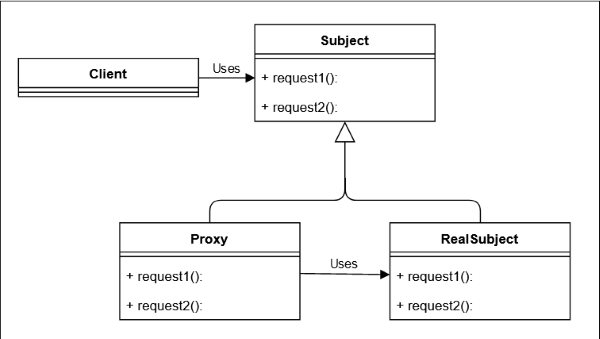

サンプルコードのProxyクラスの図 \
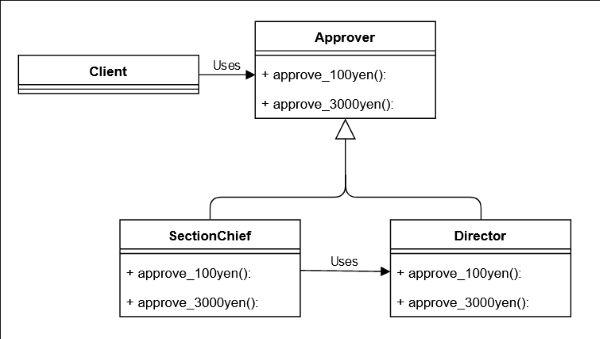

In [ ]:
"""
承認者 -> approver 
部長 -> Director 
課長 -> SectionChief

"""
from time import sleep

# ユーザー視点
# Proxy(課長:SectionChief) にrequest(課題)を投げるだけ
def main():
    sectionchief = SectionChief()

    print(sectionchief.approve_100yen())
    print(sectionchief.approve_3000yen())

In [ ]:
# Subject
class Approver:
    def approve_100yen(self):
        raise NotImplementedError('abstract method')

    def approve_3000yen(self):
        raise NotImplementedError('abstract method')

In [ ]:
# Realsubject(主体者) = Director(部長)

class Director(Approver):
    def approve_100yen(self):
        sleep(1)
        return '承認します'

    def approve_3000yen(self):
        sleep(3)
        return '承認します'

In [ ]:
# Proxy(代理人) = SectionChief(課長)

class SectionChief(Approver):
    # できる仕事(approve_100yen)は自分で行う
    def approve_100yen(self):
        return 'OK'

    # できない仕事(approve_3000yen)はできる人(Realsubject:Director)に投げる
    def approve_3000yen(self):
        return Director().approve_3000yen()

# メリット : 処理の重いRealsubjectの負担を軽減できる

In [ ]:
main() 
# 課長の回答まで1秒　-> OK
# 課長 -> 部長で回答を得るまで3秒 -> 承認します

OK
承認します


## 振る舞いに関するパターン
### Visitor
* 既存のクラスに対して、新たな操作を追加したいしたり、特に複数のクラスにまたがった処理を作成したりする。

In [ ]:
# 抽象クラス・・・抽象メゾットを１つ以上持つクラス
# 抽象メゾット・・・中に処理を記述せず、継承先が処理を記述することで初めて機能するメゾット

In [ ]:
from abc import ABCMeta, abstractmethod

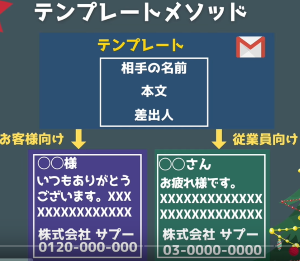

### 抽象メソッド
具体的な実装はされない

In [ ]:
class MailCreator(metaclass = ABCMeta):
    def __init__(self,name,text):
        self.name = name
        self.text = text
    
    @abstractmethod
    def header(self):
        # 相手の名前のテキストを生成
        pass

    @abstractmethod
    def body(self):
        # 本文を生成
        pass

    @abstractmethod
    def footer(self):
        # 差出人のテキストを生成
        pass

   # サブクラスで実装 
    def create(self):
        h = self.header()
        b = self.body()
        f = self.footer()
        return f'{h}{b}{f}'

* お客様向けメール生成

In [ ]:
class CustomerMailCreator(MailCreator):
    def header(self):
        return self.name + '様 '

    def body(self):
        return ('いつもありがとうございます。' + self.text) 

    def footer(self):
        return ('===株式会社Opus===')

* 従業員向けメール生成

In [ ]:
class StaffMailCreator(MailCreator):
    def header(self):
        return self.name + 'さん '

    def body(self):
        return ('お疲れ様です。' + self.text)

    def footer(self):
        return('===株式会社Opus===')

In [ ]:
text_1 = ('クーポン券をお送りいたします。何卒よろしくお願いいたします。')
text_2 = ('寒暖の差が激しいので、体調を崩さないように！')
c = CustomerMailCreator('佐藤',text_1)
c.create()

# s = StaffMailCreator('後藤',text_2)
# s.create()

'佐藤様 いつもありがとうございます。クーポン券をお送りいたします。何卒よろしくお願いいたします。===株式会社Opus==='

### Bridge
* 2つの独立したクラス（機能のクラス階層と実装のクラス階層）をつなぐ役割。

In [ ]:
import random
import sys


# Displayクラス(機能クラス階層の最上位クラス)
# コンストラクタの'impl'には、実装を表すクラスのインスタンスが渡される。
# このインスタンスが２つのクラス階層をつなぐ。

class Display(object):
    def __init__(self,impl):
        self.impl = impl

    def opening(self):
        self.impl.rawOpening()

    def printing(self):
        self.impl.rawPrinting()

    def closing(self):
        self.impl.rawClosing()

    def display(self):
        self.opening()
        self.printing()
        self.closing()

In [ ]:
# CountDisplayクラス(機能のクラス階層)
# Displayクラスに指定回数表示するという機能（multiDisplayメソッド）を追加したもの。
# これは機能のクラス階層

class CountDisplay(Display):
    def __init__(self, impl):
        super().__init__(impl)

    def multiDisplay(self, times):
        self.opening()
        for i in range(times):
            self.printing()

        self.closing()

In [ ]:
# DisplayImplクラス(実装クラス階層の最上位クラス)
# Displayクラスの'openingメソッド','printingメソッド','closingメソッド'に対応する。
# メソッドの宣言のみ。

class DisplayImpl(object):
    def rawOpening(self):
        pass

    def rawPrinting(self):
        pass

    def rawClosing(self):
        pass


In [ ]:
# StringDisplayImplクラス(実装クラス階層)
# DisplayImplクラスのサブクラスとしてメソッドを実装。

class StringDisplayImpl(DisplayImpl):
    def __init__(self, st):
        self.st = st
        self.width = len(st)

    def rawOpening(self):
        self.printLine()

    def rawPrinting(self):
        print("|%s|" %self.st)

    def rawClosing(self):
        self.printLine()

    def printLine(self):
        print("+%s+" %("-"*self.width))

In [ ]:
# 機能クラス階層にランダム回数を表示する処理を追加

class RandomDisplay(CountDisplay):
    def random_Display(self, times):
        self.multiDisplay(random.randrange(times))

In [ ]:
# 実装クラス階層にテキストファイルの内容を表示する処理を追加

class TextDisplayImpl(DisplayImpl):
    def __init__(self, textfile):
        self.textfile = textfile

    def rawOpening(self):
        self.f = open(self.textfile)

    def rawPrinting(self):
        print(self.f.readlines()[0])

    def rawClosing(self):
        self.f.close()

In [ ]:
# 機能クラスと実装クラスの両階層に模様表示の追加

class IncreasingDisplay(CountDisplay):
    def __init__(self,impl,increase):
        super().__init__(impl)
        self.increase = increase

    def increasing_Display(self, max_number):
        self.max_number = max_number
        for i in range(0, max_number, self.increase):
            self.multiDisplay(i)

class DecoDisplayImpl(DisplayImpl):
    def __init__(self, start, deco, last):
        self.start = start
        self.deco = deco
        self.last = last

    def rawOpening(self):
        sys.stdout.write(self.start)

    def rawPrinting(self):
        sys.stdout.write(self.deco)

    def rawClosing(self):
        sys.stdout.write("%s\n" %(self.last))

In [ ]:
d1 = Display(StringDisplayImpl("Hello, Japan."))
d2 = CountDisplay(StringDisplayImpl("Hello, World."))
d3 = CountDisplay(StringDisplayImpl("Hello, Universe."))
d4 = RandomDisplay(StringDisplayImpl("Hello, Random."))
d5 = Display(TextDisplayImpl("newfile.txt"))
d6 = IncreasingDisplay(DecoDisplayImpl("<", "*", ">"), 1)
d7 = IncreasingDisplay(DecoDisplayImpl("|", "#", "-"), 2)
d1.display()
d2.display()
d3.display()
d3.multiDisplay(5)
d4.random_Display(5)
# d5.display()
d6.increasing_Display(4)
d7.increasing_Display(12)

+-------------+
|Hello, Japan.|
+-------------+
+-------------+
|Hello, World.|
+-------------+
+----------------+
|Hello, Universe.|
+----------------+
+----------------+
|Hello, Universe.|
|Hello, Universe.|
|Hello, Universe.|
|Hello, Universe.|
|Hello, Universe.|
+----------------+
+--------------+
|Hello, Random.|
+--------------+
<>
<*>
<**>
<***>
|-
|##-
|####-
|######-
|########-
|##########-


# Proxyパターン
## 例題
**稟議の仕組みを考えます。** \
* 100円の場合は課長も部長もOKを出せます。 \
* 3000円の場合は部長しかOKを出せません。 \
* 部長は忙しいので、稟議を出すのに時間がかかってしまいます。 \
* 起案者（稟議を上げる人）は課長に起案することにします。

一般的なProxyクラスの図 \
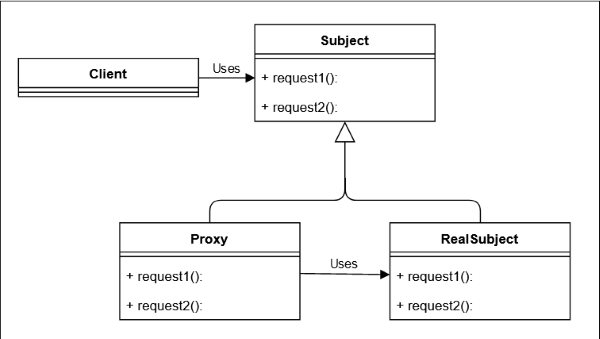

サンプルコードのProxyクラスの図 \
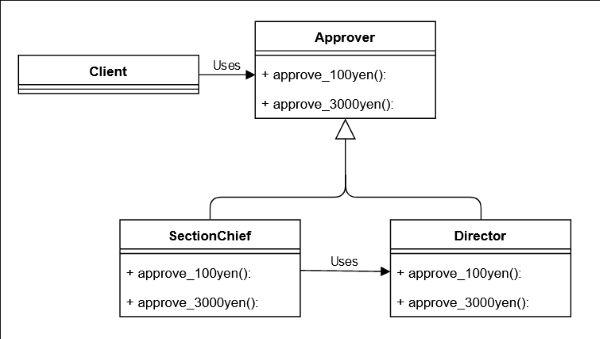

In [ ]:
"""
承認者 -> approver 
部長 -> Director 
課長 -> SectionChief

"""
from time import sleep

# ユーザー視点
# Proxy(課長:SectionChief) にrequest(課題)を投げるだけ
def main():
    sectionchief = SectionChief()

    print(sectionchief.approve_100yen())
    print(sectionchief.approve_3000yen())

In [ ]:
# Subject
class Approver:
    def approve_100yen(self):
        raise NotImplementedError('abstract method')

    def approve_3000yen(self):
        raise NotImplementedError('abstract method')

In [ ]:
# Realsubject(主体者) = Director(部長)

class Director(Approver):
    def approve_100yen(self):
        sleep(1)
        return '承認します'

    def approve_3000yen(self):
        sleep(3)
        return '承認します'

In [ ]:
# Proxy(代理人) = SectionChief(課長)

class SectionChief(Approver):
    # できる仕事(approve_100yen)は自分で行う
    def approve_100yen(self):
        return 'OK'

    # できない仕事(approve_3000yen)はできる人(Realsubject:Director)に投げる
    def approve_3000yen(self):
        return Director().approve_3000yen()

# メリット : 処理の重いRealsubjectの負担を軽減できる

In [ ]:
main() 
# 課長の回答まで1秒　-> OK
# 課長 -> 部長で回答を得るまで3秒 -> 承認します

OK
承認します


# Proxyパターン
## オリジナル問題
**算数の問題を出します。** \
* 足し算の場合は小学生も中学生も答えます。 \
* 方程式の場合は中学生しか答えを出せません。 \
* 中学生は忙しいので答えを得るまでに時間がかかってしまいます。 \
* 質問者は小学生に答えを求めます。

オリジナル \
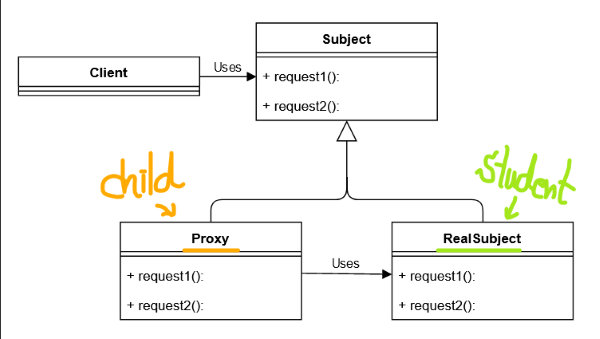

In [ ]:
from time import sleep

In [ ]:
# 質問者小学生に質問する

def main(x,y):
    child = Child()

    print(child.approve_Calculation(x,y))
    print(child.approve_equation(x,y))


In [ ]:
class Approver:
    def approve_Calculation(self,x,y):
        raise NotImplementedError('abstract method')

    def approve_equation(self,x,y):
        raise NotImplementedError('abstract method')
    

In [ ]:
# 中学生は足し算も方程式も答えられる

class Students(Approver):
    def approve_Calculation(self,x,y):
        a = x + y
        sleep(1)
        return a

    def approve_equation(self,x,y):
        a = x**2 + y
        sleep(5)
        return a       

In [ ]:
# 小学生は足し算のみ自力で答えて、方程式は分からないので中学生に答えてもらう

class Child(Approver):
    def approve_Calculation(self,x,y):
        a = x + y
        sleep(1)
        return a

    def approve_equation(self,x,y):
        a = x**2 + y
        return Students().approve_equation(x,y)      

In [ ]:
main(2,3)
# 足し算は小学生からの回答なのですぐに回答が得られる（今回は１秒後）
# 方程式は小学生 -> 中学生の流れで回答を得るので時間がかかる（今回は5秒後)

5
7
